In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

In [2]:
train_datagen = image.ImageDataGenerator(
        rescale=1./255)

test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../data/split/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
)

Found 2500 images belonging to 5 classes.


In [3]:
validation_generator = test_datagen.flow_from_directory(
        '../data/split/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 620 images belonging to 5 classes.


In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, input_shape=(150,150,3), activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='sgd',
            loss = 'categorical_crossentropy',
              metrics = ['accuracy']  )

history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/10
20/20 [==============================] - 20s 1s/step - loss: 1.6641 - acc: 0.1969 - val_loss: 1.5785 - val_acc: 0.2962
Epoch 2/10
20/20 [==============================] - 15s 743ms/step - loss: 1.5827 - acc: 0.2568 - val_loss: 1.5670 - val_acc: 0.3065
Epoch 3/10
20/20 [==============================] - 18s 905ms/step - loss: 1.5654 - acc: 0.2797 - val_loss: 1.5584 - val_acc: 0.2019
Epoch 4/10
20/20 [==============================] - 19s 958ms/step - loss: 1.5708 - acc: 0.2297 - val_loss: 1.5610 - val_acc: 0.2097
Epoch 5/10
20/20 [==============================] - 19s 969ms/step - loss: 1.5517 - acc: 0.2453 - val_loss: 1.5625 - val_acc: 0.2474
Epoch 6/10
20/20 [==============================] - 19s 949ms/step - loss: 1.5543 - acc: 0.2562 - val_loss: 1.5403 - val_acc: 0.2286
Epoch 7/10
20/20 [==============================] - 19s 936ms/step - loss: 1.5245 - acc: 0.2453 - val_loss: 1.5374 - val_acc: 0.3410
Epoch 8/10
20/20 [==============================] - 19s 929ms/step - los

In [17]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

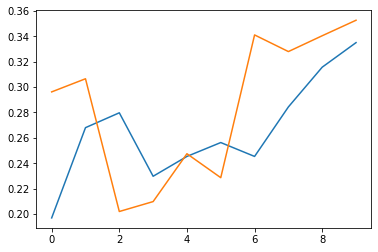

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])